In [1]:
import os
import sys
import datatable as dt

project_root = os.getenv("PROJECT_ROOT")
if project_root is None:
    project_root = r"C:\Users\saisu\OneDrive\Desktop\GitHub Repos\SmartML-Opt-Self-Balancing-AutoML-Framework-for-Imbalanced-Data"

sys.path.append(project_root)



In [2]:
from src.ingest import load_data
from src.preprocess import clean_data, encode_features, scale_features
from src.benchmark import run_tpot, run_lightautoml
import warnings
warnings.filterwarnings("ignore")


'nlp' extra dependency package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.


c:\ML_Project\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\ML_Project\venv\lib\site-packages\lightautoml\ml_algo\dl_model.py:42: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
c:\ML_Project\venv\lib\site-packages\lightautoml\text\embed.py:22: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
c:\ML_Project\venv\lib\site-packages\lightautoml\text\dl_transformers.py:25: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")


In [3]:
df = load_data(r"C:\Users\saisu\OneDrive\Desktop\GitHub Repos\SmartML-Opt-Self-Balancing-AutoML-Framework-for-Imbalanced-Data\data\bank.csv")
df_clean = clean_data(df)
df_encoded = encode_features(df_clean)
X_scaled, y = scale_features(df_encoded, target_column="y")

print("Data prepared: ", X_scaled.shape)


Data prepared:  (764, 16)


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Running TPOT...


Version 0.12.1 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                             
Generation 1 - Current best internal CV score: 0.8358810068649886
                                                                             
Generation 2 - Current best internal CV score: 0.8411441647597254
                                                                             
Generation 3 - Current best internal CV score: 0.8411441647597254
                                                                             
Generation 4 - Current best internal CV score: 0.8411441647597254
                                                                              
Generation 5 - Current best internal CV score: 0.8411441647597254
                                                                              
Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=11)
TPOT F1 Score: 0.4864864864864865
Time: 77.29 sec
              precision 

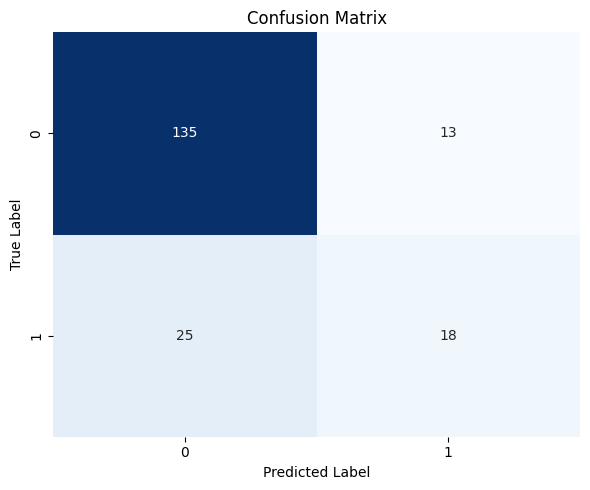

TPOT Confusion Matrix saved to results/tpot_confusion_matrix.png


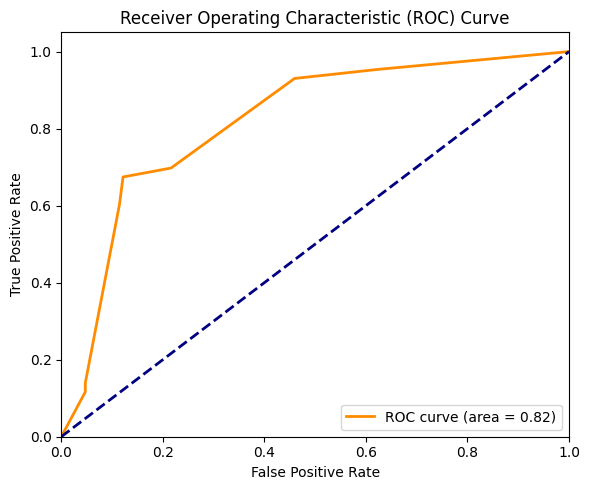

TPOT ROC Curve saved to results/tpot_roc_curve.png


In [5]:

run_tpot(X_scaled, y)


LightAutoML Classification Report (Out-of-Fold Predictions):
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       593
           1       0.65      0.49      0.56       171

    accuracy                           0.83       764
   macro avg       0.76      0.71      0.72       764
weighted avg       0.82      0.83      0.82       764

LightAutoML training time: 120.09 seconds


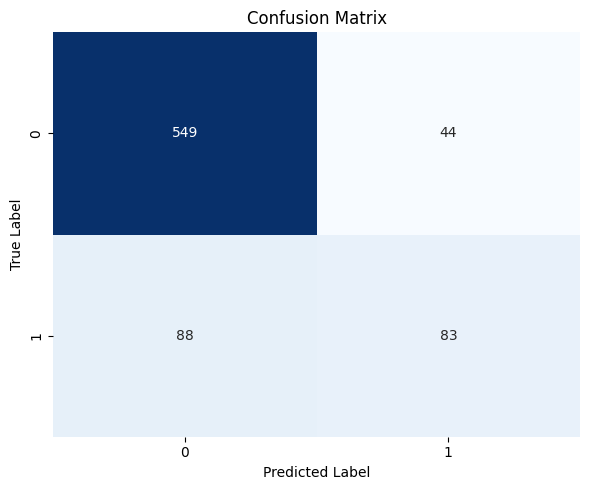

LightAutoML Confusion Matrix saved to results/lightautoml_confusion_matrix.png


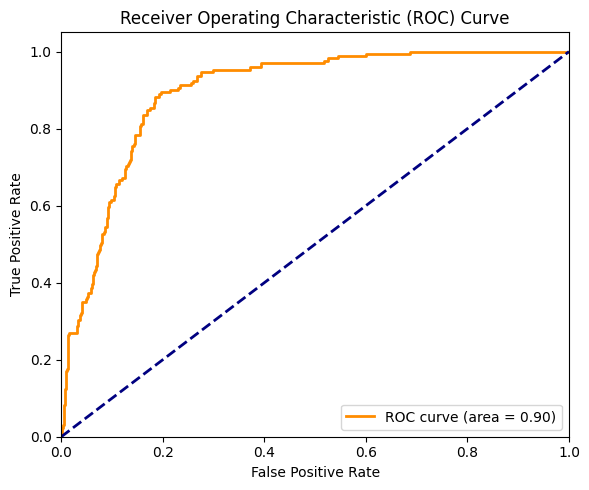

LightAutoML ROC Curve saved to results/lightautoml_roc_curve.png


In [6]:
run_lightautoml(X_scaled, y)

Training RandomForest...
Training GradientBoosting...
Training SVC...
Best model: GradientBoosting with score: 0.7724
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       119
           1       0.75      0.85      0.79        59

    accuracy                           0.85       178
   macro avg       0.83      0.85      0.84       178
weighted avg       0.86      0.85      0.86       178



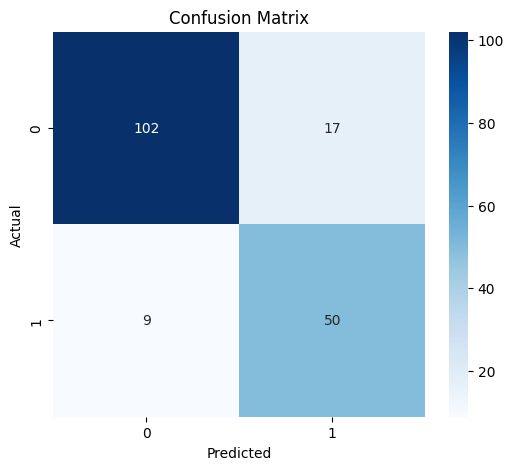

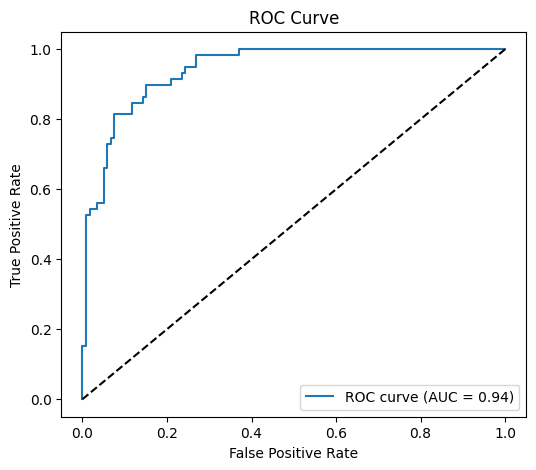

Pipeline execution completed.


In [5]:
from src.pipeline import run_pipeline

# Running the SmartML-Opt pipeline (This handles everything: data preprocessing, SMOTE, feature selection, model training)
run_pipeline(data_path=r"C:\Users\saisu\OneDrive\Desktop\GitHub Repos\SmartML-Opt-Self-Balancing-AutoML-Framework-for-Imbalanced-Data\data\bank.csv", target_col="y", smote_ratio=0.5, n_features=15)
